# KQ-Methode

### Beispiel: Bearbeitungszeit von Kundenrechnungen

Ein Buchhaltungsunternehmen möchte die Bearbeitungszeit von Kundenrechnungen besser verstehen und vorhersagen. Das Unternehmen hat uns Daten über die Anzahl der täglich bearbeiteten Rechnungen und die dafür benötigte Zeit zur Verfügung gestellt. Wir sollen nun eine Vorhersage für die Bearbeitungszeit treffen, wenn die Anzahl der Rechnungen bekannt ist.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:

df = pd.read_csv('https://raw.githubusercontent.com/febse/data/main/econ/invoices.txt', delimiter="\t")
df.head()

,Day,Invoices,Time
0,1,149,2.1
1,2,60,1.8
2,3,188,2.3
3,4,23,0.8
4,5,201,2.7


Der Datensatz enthält die folgenden Variable (Spalten):

- `Day` (numeric): Nummer des Tages, an dem die Rechnungen bearbeitet wurden
- `Invoices` (numeric): Anzahl der bearbeiteten Rechnungen
- `Time` (numeric): Zeit in Stunden, die für die Bearbeitung benötigt wurde


<Axes: xlabel='Invoices', ylabel='Time'>

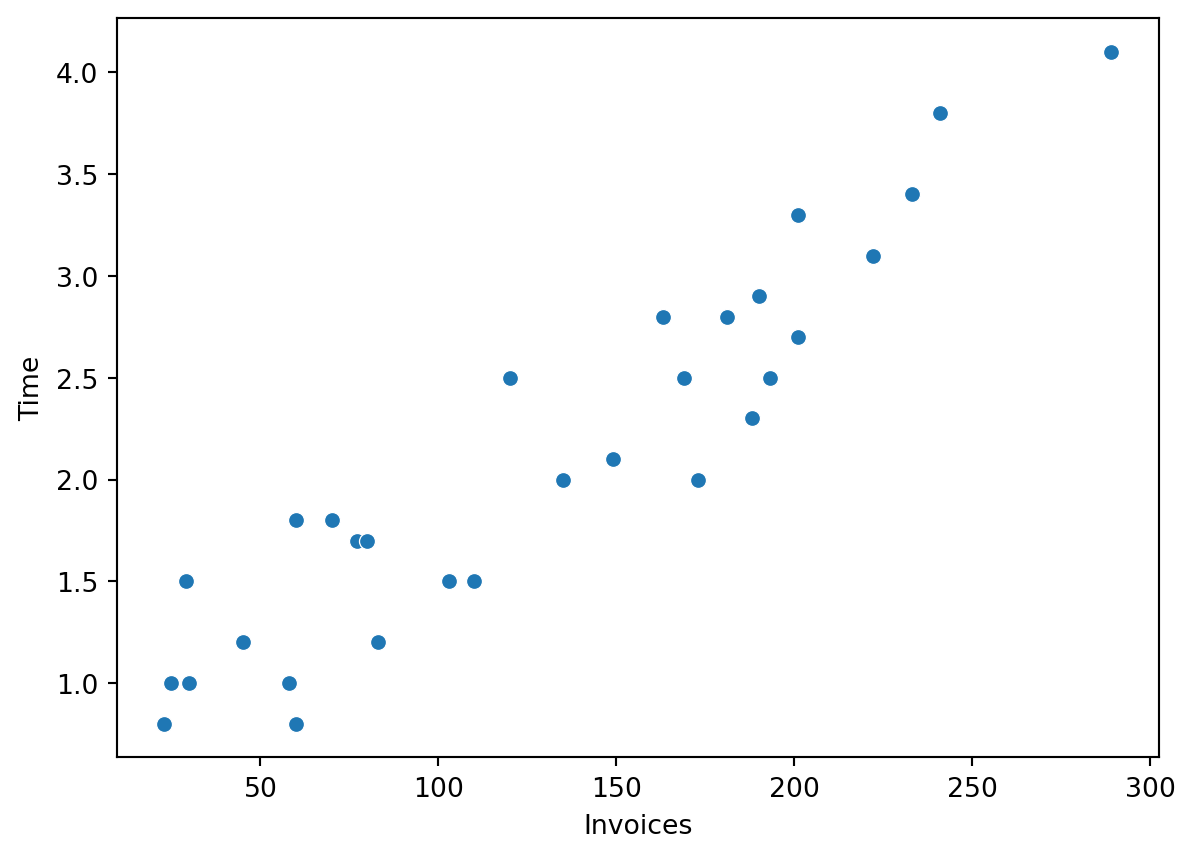

In [3]:
#| label: fig-invoices-scatter
#| fig-cap: Streudiagramm der Bearbeitungszeit der Rechnungen und der Anzahl der Rechnungen

sns.scatterplot(data=df, x="Invoices", y="Time")

In [4]:
# Naives Modell:

time_predicted1 = np.repeat(df['Time'].mean(), len(df))

res_1 = df['Time'] - time_predicted1
res_1.head()

0   -0.01
1   -0.31
2    0.19
3   -1.31
4    0.59
Name: Time, dtype: float64

In [5]:
# Ein Modell, das die Anzahl der Rechnungen berücksichtigt:

time_predicted2 = 0.5 + 0.01 * df['Invoices']

res_2 = df['Time'] - time_predicted2
res_2.head()

0    0.11
1    0.70
2   -0.08
3    0.07
4    0.19
dtype: float64

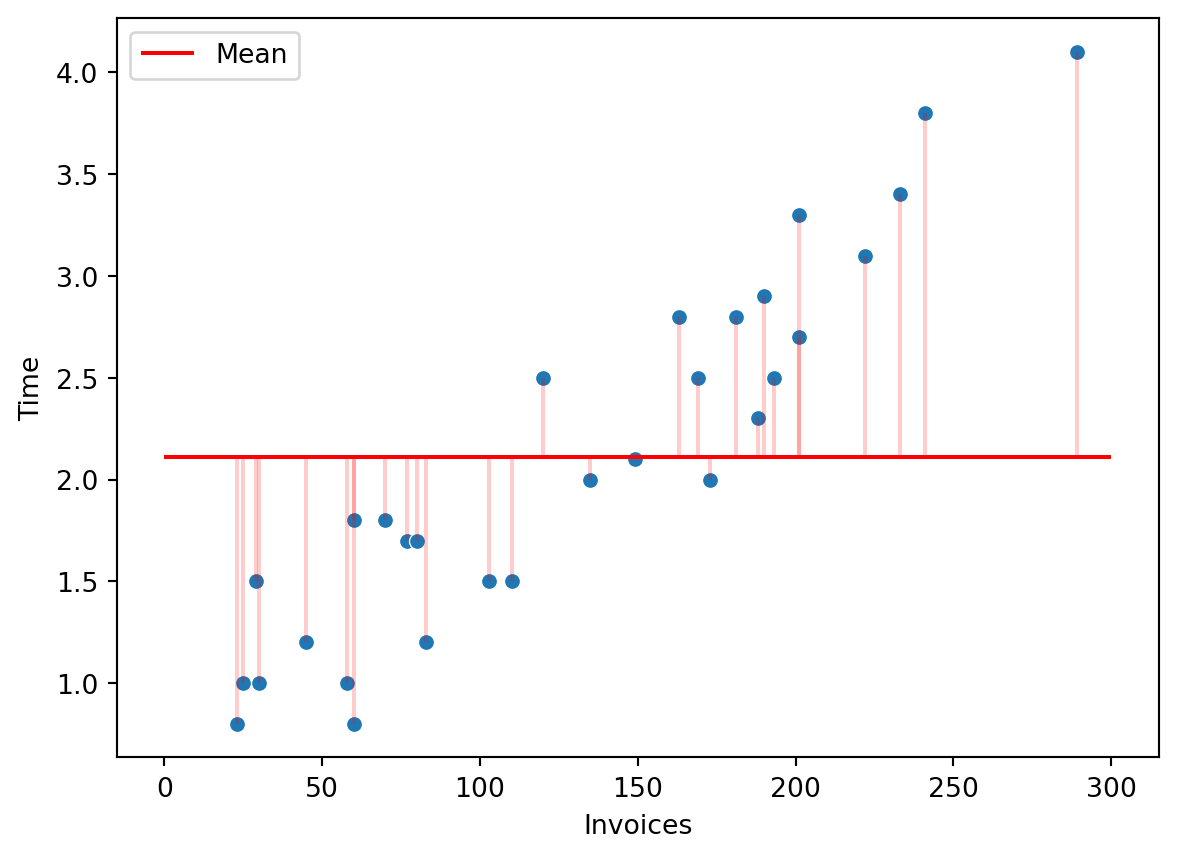

In [6]:
fig, ax = plt.subplots()

sns.scatterplot(data=df, x="Invoices", y="Time", ax=ax)
ax.hlines(y=time_predicted1.mean(), xmin=0, xmax=300, color='red', label='Mean')
ax.legend(loc=0)
ax.vlines(x=df["Invoices"], ymin=time_predicted1, ymax=df["Time"], color='red', alpha=0.2)

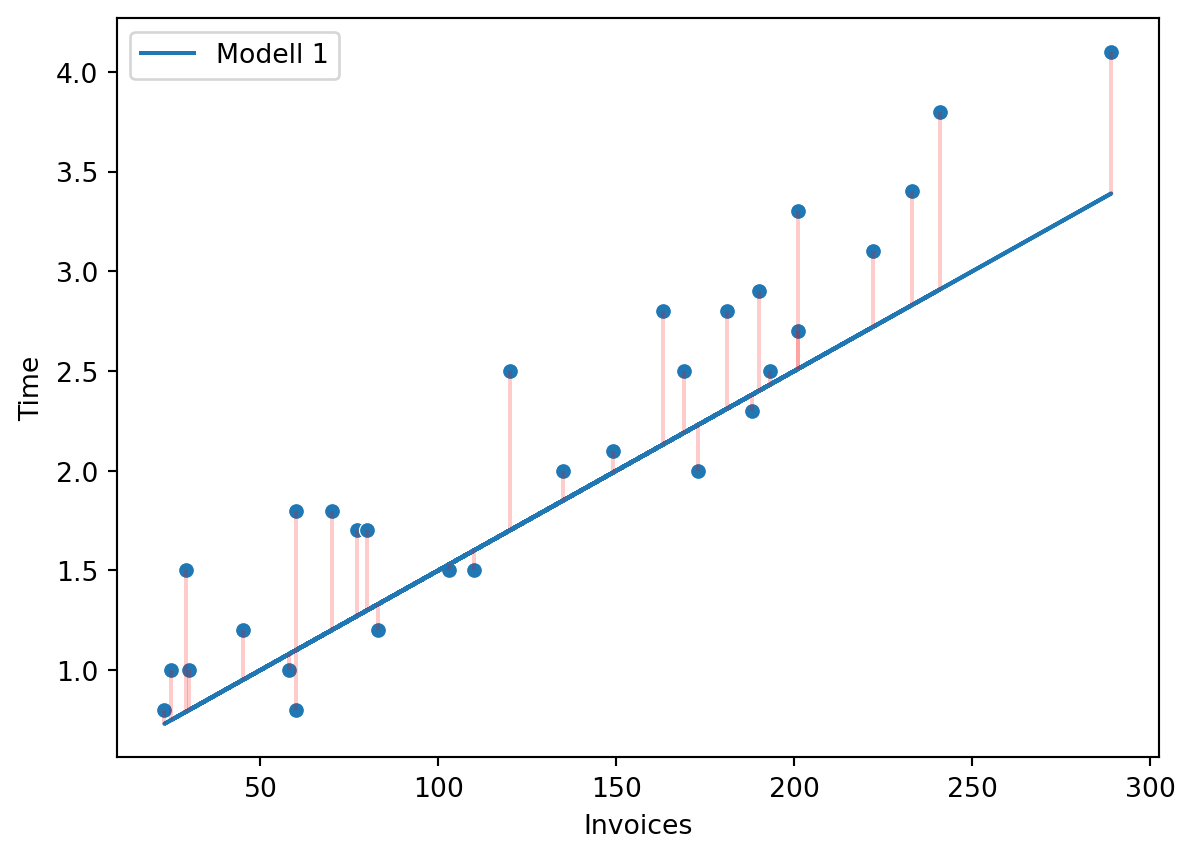

In [7]:
fig, ax = plt.subplots()

sns.scatterplot(data=df, x="Invoices", y="Time", ax=ax)
ax.plot(df["Invoices"], time_predicted2, '-', label='Modell 1')
ax.legend(loc=0)
ax.vlines(x=df["Invoices"], ymin=time_predicted2, ymax=df["Time"], color='red', alpha=0.2)

Welches Modell passt besser zu den Daten? Aus den graphischen Darstellungen können wir sehen, daß die Abweichungen zwischen den Prognosen (Modell) und den tatsächlichen Werten (Daten) beim zweiten Modell geringer sind. Es ist allerdings wichtig, die Modellgüte mit Hilfe von Kennzahlen zu bewerten.

Wir könnten z.B. die Summe der Abweichungen zwischen Prognosen und Beobachtungen berechnen.

$$
\frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y}_i)
$$


In [8]:
res_1.sum()

2.886579864025407e-15

In [9]:
res_2.sum()

9.29

Dieses scheint allerdings unsinnige Ergebnisse zu produzieren, denn die Prognosen des zweiten Modells offensichtlich näher an den Daten liegen. Die Summe der Abweichungen ist allerdings größer als beim ersten Modell. Das liegt daran, daß sich positive und negative Abweichungen in der Summe gegenseitig aufheben. Um das zu vermeiden, könnten wir die z.B. die Beträge der Abweichungen summieren

$$
\sum_{i=1}^{n} |y_i - \hat{y}_i|
$$

Es ist allerdings viel einfacher, die quadratischen Abweichungen zu summieren, denn die quadratische Funktion ist stetig differenzierbar und das ist mathematisch sehr bequem.

$$
\text{RSS} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Um hervorzuheben, daß die Residuenquadratsumme von den Koeffizienten $\hat{\beta}_0$ und $\hat{\beta}_1$ abhängt, schreiben wir die Residuenquadratsumme als Funktion der Koeffizienten.

$$
\text{RSS}(\hat{\beta}_0, \hat{\beta}_1) = \sum_{i=1}^{n} (y_i - (\hat{\beta}_0 + \hat{\beta}_1 x_i))^2
$$


Lasst uns die Residuenquadratsumme für verschiedene Werte der Koeffizienten berechnen und die Ergebnisse graphisch darstellen. Wir werden die Residuenquadratsumme als Funktion der Koeffizienten in einem 3D-Diagramm darstellen.

Text(0.5, 0, 'RSS')

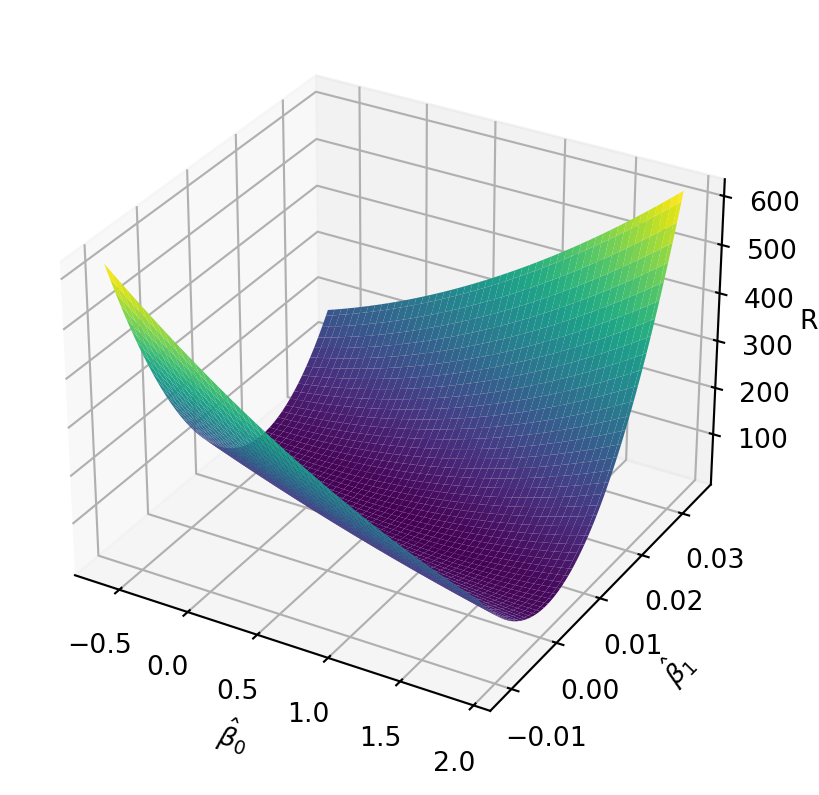

In [10]:

exp_f = 2

bb0, bb1 = np.meshgrid(
    np.linspace(0.6417 - 0.6417 * exp_f, 0.6417 + 0.6417 * exp_f, 100),
    np.linspace(0.0113 - 0.0113 * exp_f, 0.0113 + 0.0113 * exp_f, 100)
)

# bb0, bb1 = np.meshgrid(
#     np.linspace(-0.7 , 0.7, 100),
#     np.linspace(-0.01, 0.01, 100)
# )

rss = np.zeros_like(bb0)

for i in range(bb0.shape[0]):
    for j in range(bb0.shape[1]):
        time_predicted = bb0[i, j] + bb1[i, j] * df['Invoices']
        res = df['Time'] - time_predicted
        rss[i, j] = np.sum(res**2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(bb0, bb1, rss, cmap='viridis')

ax.set_xlabel(r"$\hat{\beta}_0$")
ax.set_ylabel(r"$\hat{\beta}_1$")
ax.set_zlabel('RSS')

Bisher haben wir die Koeffizienten der Prognosegleichung manuell festgelegt. Es wäre jedoch besser, wenn wir die Koeffizienten automatisch so festlegen könnten, dass die Vorhersage möglichst genau ist. Dieses Ziel erreichen wir mit der Methode der kleinsten Quadrate.

$$
\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 \cdot x
$$

Wir möchten die Koeffizienten $\hat{\beta}_0$ und $\hat{\beta}_1$ so bestimmen, dass die Summe der quadrierten Abweichungen zwischen den beobachteten und den vorhergesagten Werten minimal ist.


## Modellschätzung

Es gibt mehrere Möglichkeiten, die Koeffizienten mit der KQ-Methode in `Python` zu bestimmen.

In [11]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(df[['Invoices']], df['Time'])

lm.intercept_, lm.coef_

(0.6417098798216143, array([0.01129164]))

In [12]:
import statsmodels.formula.api as smf

model = smf.ols(formula='Time ~ Invoices', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Time   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     190.4
Date:                Wed, 06 Mar 2024   Prob (F-statistic):           5.17e-14
Time:                        17:59:41   Log-Likelihood:                -8.2528
No. Observations:                  30   AIC:                             20.51
Df Residuals:                      28   BIC:                             23.31
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6417      0.122      5.248      0.000       0.391       0.892
Invoices       0.0113      0.001     13.797      0.000       0.010       0.013
==============================================================================
Omnibus:                        2.815   Durbin-Watson:                   1.760
Prob(Omnibus):                  0.245   Jarque-Bera (JB):                1.341
Skew:                          -0.042   Prob(JB):                        0.511
Kurtosis:                       1.968   Cond. No.                         303.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Ein Modell für die Daten

$$
\begin{align}
\text{Time}_i = \beta_0 + \beta_1 \cdot \text{Invoices}_i + e_i \\
e_i \sim N(0, \sigma^2)
\end{align}
$$

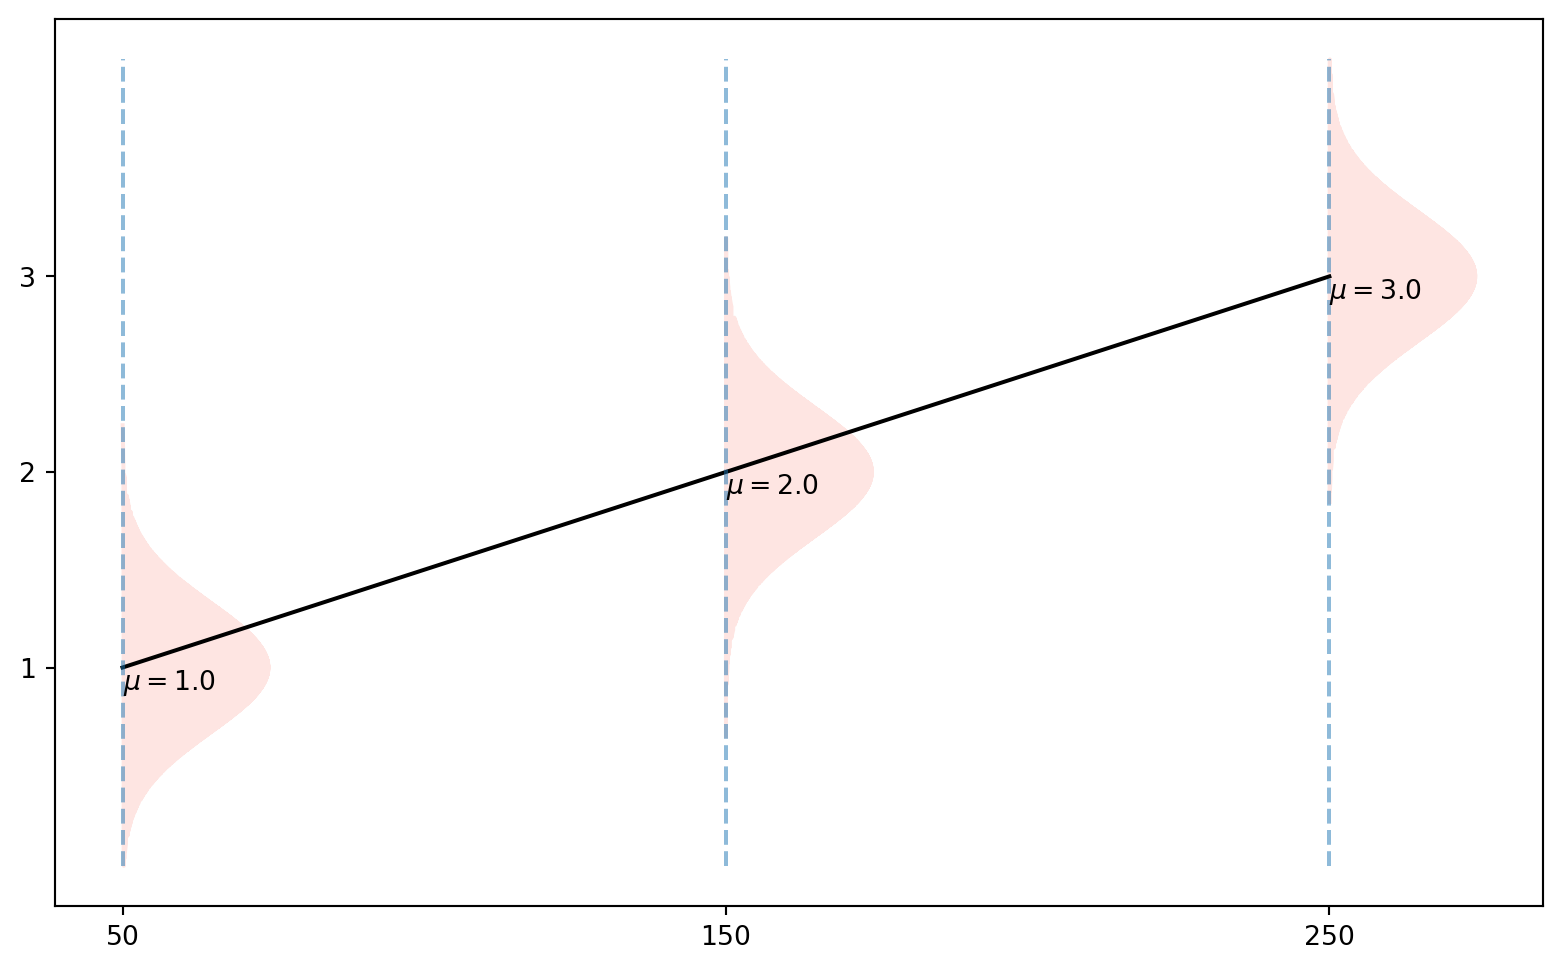

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define variables
x_breaks = np.array([50, 150, 250])
y_hat = 0.5 + 0.01 * x_breaks

# Create a DataFrame similar to expand_grid in R
dt = pd.DataFrame(np.array(np.meshgrid(np.arange(1, 2001), x_breaks)).T.reshape(-1,2), columns=['B', 'x'])

# Add mu, y, and dy columns
dt['mu'] = 0.5 + 0.01 * dt['x']
dt['y'] = np.random.normal(loc=dt['mu'], scale=0.33)
dt['dy'] = dt['x'] + 20 * norm.pdf(dt['y'], loc=dt['mu'], scale=0.33)

# Sort values
dt = dt.sort_values(['x', 'dy'])

# Plotting
plt.figure(figsize=(10, 6))

# Assuming 'invoices' is a DataFrame with 'Invoices' and 'Time' columns
# plt.scatter(invoices['Invoices'], invoices['Time'], alpha=0.5)

for x_val in dt['x'].unique():
    dt_x = dt[dt['x'] == x_val]
    plt.plot(dt_x['dy'], dt_x['y'], alpha=0.2, color='salmon')

plt.plot(dt['x'], dt['mu'], color='black')
plt.vlines(x_breaks, ymin=dt['y'].min(), ymax=dt['y'].max(), linestyles='dashed', alpha=0.5)

for x_val, y_val in zip(x_breaks, y_hat):
    plt.text(x_val, y_val, r'$\mu = {}$'.format(round(y_val, 1)), va='top')

plt.xticks(x_breaks)
plt.yticks(0.5 + 0.01 * x_breaks)
plt.show()

## Die einfache lineare Regression in Matrixform

Unsere Modellgleichung, die wir für die Vorhersage der Bearbeitungszeit verwenden, war:

$$
\hat{\text{Time}} = \hat{\beta}_0 + \hat{\beta}_1 \text{Rechnungen}
$$

Nun wollen wir dieselbe Gleichung in Matrixform schreiben. Dazu schreiben wir diese Modellgleichung
für alle Beobachtungen in unserem Datensatz auf:

$$
\begin{align*}
\hat{\text{Time}}_1 &= \hat{\beta}_0 + \hat{\beta}_1 \text{Rechnungen}_1 \\
\hat{\text{Time}}_2 &= \hat{\beta}_0 + \hat{\beta}_1 \text{Rechnungen}_2 \\
\hat{\text{Time}}_3 &= \hat{\beta}_0 + \hat{\beta}_1 \text{Rechnungen}_3 \\
\vdots \\
\hat{\text{Time}}_n &= \hat{\beta}_0 + \hat{\beta}_1 \text{Rechnungen}_n \\
\end{align*}
$$

Nun laßt uns die obigen Gleichungen in Matrixform schreiben.

$$
\begin{bmatrix}
\hat{\text{Time}}_1 \\
\hat{\text{Time}}_2 \\
\hat{\text{Time}}_3 \\
\vdots \\
\hat{\text{Time}}_n \\
\end{bmatrix}
=
\begin{bmatrix}
1 & \text{Rechnungen}_1 \\
1 & \text{Rechnungen}_2 \\
1 & \text{Rechnungen}_3 \\
\vdots & \vdots \\
1 & \text{Rechnungen}_n \\
\end{bmatrix}
\begin{bmatrix}
\hat{\beta}_0 \\
\hat{\beta}_1 \\
\end{bmatrix}

$$


## Scenarios

Die Koeffizienten in Regressionsmodellen vergleichen verschiedene Szenarien. Es ist unsere Aufgabe, die Modelle so aufzustellen, dass wir sinnvolle Vergleiche anstellen können.

Insbesonderen in Modellen mit Interaktionseffekten ist es wichtig, die Variablen zu skalieren (XXX, w), um den Koeffizienten eine sinnvolle Interpretation zu geben.

## Anmerkung

Die Variablen, die wir in den Modellen verwenden, nennen wir auch Prädiktoren

## Interpretation

Es gibt zwei Interpretationen der Koeffizienten in Regressionsmodellen (XXX, check):

- Vorhersage: 

